In [117]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import numpy as np

In [118]:
from matplotlib import pyplot as plt

In [119]:
# Importing the dataset
movies_clean_df = pd.read_csv('movies_clean.csv', delimiter = ',', quotechar='"')
movies_clean_df.head()

,title,release_date,genres,overview,first_genre
0,Toy Story,1995-10-30,Animation|Comedy|Family,led woodi andi toy live happili room andi birt...,Animation
1,Jumanji,1995-12-15,Adventure|Fantasy|Family,when sibl judi peter discov enchant board game...,Adventure
2,Waiting to Exhale,1995-12-22,Comedy|Drama|Romance,cheat mistreat step women hold breath wait elu...,Comedy
3,Father of the Bride Part II,1995-02-10,Comedy,just georg bank recov daughter wed receiv news...,Comedy
4,Heat,1995-12-15,Action|Crime|Drama|Thriller,obsess master thief neil mccauley lead top-not...,Action


In [120]:
def get_unique_genres(df, column='first_genre'):
  genres = set()
  for line in df[column]:
    if column == 'genre':
      genres.update(line.split('|'))
    else:
      genres.add(line)
  return sorted(genres)

# Get class labels
classes = get_unique_genres(movies_clean_df)
print(classes)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Romance', 'Science Fiction', 'Thriller']


In [121]:
# Splitting dataframes into train and test
train_movies_df, test_movies_df = train_test_split(movies_clean_df, test_size=0.2)

# Splitting dataframes into X and y
X_train = train_movies_df['overview']
y_train = train_movies_df['first_genre']
# y_train = train_movies_df['genres']
X_test = test_movies_df['overview']
y_test = test_movies_df['first_genre']
# y_test = test_movies_df['genres']

In [122]:
X_train

2606        retir mobster plan last crime save retir home
2050    hollywood version popular video game seri wing...
2073    foolish wais talent comedian hard-edg tri make...
6134    group scientist san francisco struggl stay ali...
2082    high school teacher person life becom complic ...
                              ...                        
1343    marci worker reelect campaign bumbl senat john...
495     tyler know lot accid so much scare anyth might...
4429    chronicl bob dylan strang evolut folk singer p...
5604    yoshiyama kazuko grade junior high day 's clea...
1071    simple-mind garden name chanc spent life washi...
Name: overview, Length: 5520, dtype: object

In [123]:
y_train

2606             Action
2050             Action
2073             Comedy
6134    Science Fiction
2082             Comedy
             ...       
1343             Comedy
495             Fantasy
4429        Documentary
5604    Science Fiction
1071             Comedy
Name: first_genre, Length: 5520, dtype: object

In [124]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tf = vectorizer.fit_transform(X_train)

X_test_tf = vectorizer.transform(X_test)

In [125]:
print("X_train_tf shape", X_test_tf.shape)
print("X_test_tf shape", X_test_tf.shape)

X_train_tf shape (1380, 153748)
X_test_tf shape (1380, 153748)


In [126]:
print(X_train_tf)
print(X_test_tf)

  (0, 113406)	0.28803520512940284
  (0, 117829)	0.31229405167533086
  (0, 29529)	0.31229405167533086
  (0, 76038)	0.31229405167533086
  (0, 103171)	0.31229405167533086
  (0, 89389)	0.31229405167533086
  (0, 113416)	0.31229405167533086
  (0, 63382)	0.13704810361343253
  (0, 117720)	0.1481057067460125
  (0, 29445)	0.16072653689662178
  (0, 76026)	0.1646192247554004
  (0, 103084)	0.14826661791503032
  (0, 89375)	0.23350307653440558
  (0, 113383)	0.4021362999030046
  (1, 138397)	0.1274840328497137
  (1, 61071)	0.12317830921648439
  (1, 50351)	0.13355260946817443
  (1, 74223)	0.13355260946817443
  (1, 129156)	0.13355260946817443
  (1, 51469)	0.13355260946817443
  (1, 125930)	0.1274840328497137
  (1, 23753)	0.13355260946817443
  (1, 136753)	0.13355260946817443
  (1, 7160)	0.13355260946817443
  (1, 85193)	0.13355260946817443
  :	:
  (5519, 21070)	0.1846577063975731
  (5519, 84009)	0.17842096417408815
  (5519, 64538)	0.17842096417408815
  (5519, 54496)	0.15286856419324632
  (5519, 126862)	0.18

In [127]:
# Create the model logistic regression
LR_model = LogisticRegression(max_iter=1000, n_jobs=6)
LR_model.fit(X_train_tf, y_train)

LogisticRegression(max_iter=1000, n_jobs=6)

In [128]:
# Create the model SVC
from sklearn import svm
SVC_model = svm.SVC()
SVC_model.fit(X_train_tf, y_train)

SVC()

In [129]:
# Create the model NuSVC
NuSVC_model = svm.NuSVC()
NuSVC_model.fit(X_train_tf, y_train)

NuSVC()

In [130]:
# Create the model random forest
# from sklearn.ensemble import RandomForestClassifier
# RF_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
# RF_model.fit(X_train_tf, y_train)

In [131]:
# Predictions
LR_y_pred = LR_model.predict(X_test_tf)
SVC_y_pred = SVC_model.predict(X_test_tf)
NuSVC_y_pred = NuSVC_model.predict(X_test_tf)
# RF_y_pred = RF_model.predict(X_test_tf)

In [132]:
# Print the classification report
print("Logistic regression \n", classification_report(y_test, LR_y_pred, labels=classes), accuracy_score(y_test, LR_y_pred))
print("SVC \n", classification_report(y_test, SVC_y_pred, labels=classes), accuracy_score(y_test, SVC_y_pred))
print("NuSVC \n", classification_report(y_test, NuSVC_y_pred, labels=classes), accuracy_score(y_test, NuSVC_y_pred))
# print("Random forest accuracy :", accuracy_score(y_test, RF_y_pred))

Logistic regression 
                  precision    recall  f1-score   support

         Action       0.35      0.34      0.35       112
      Adventure       0.37      0.31      0.33       114
      Animation       0.47      0.41      0.44       111
         Comedy       0.36      0.30      0.33       125
          Crime       0.32      0.38      0.35       110
    Documentary       0.58      0.81      0.68       106
          Drama       0.30      0.24      0.27       120
        Fantasy       0.30      0.22      0.25       111
         Horror       0.48      0.44      0.46       136
        Romance       0.40      0.46      0.43       125
Science Fiction       0.39      0.65      0.49        97
       Thriller       0.26      0.20      0.23       113

       accuracy                           0.39      1380
      macro avg       0.38      0.40      0.38      1380
   weighted avg       0.38      0.39      0.38      1380

SVC 
                  precision    recall  f1-score   support


In [133]:
# Plot the image of the Confusion matrix
# plt.matshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.binary, interpolation='nearest')
# plt.title("Confusion matrix")
# plt.colorbar()
# plt.ylabel("Expected label")
# plt.xlabel("Predicted label")
# # class_names
# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, classes, rotation=45)
# plt.yticks(tick_marks, classes)
# plt.show()


In [134]:
def plot_confusion_matrix(y_test, y_pred, model_name, classes):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred, normalize='true')
  vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
  # Set the size of the figure
  fig, ax = plt.subplots(figsize=(14, 10))
  # Plot the normalized confusion matrix
  vis.plot(values_format=".2f", ax=ax)
  plt.title(model_name + ' Normalized Confusion Matrix')
  # Rotate x-axis labels
  plt.xticks(rotation=90)
  plt.show()

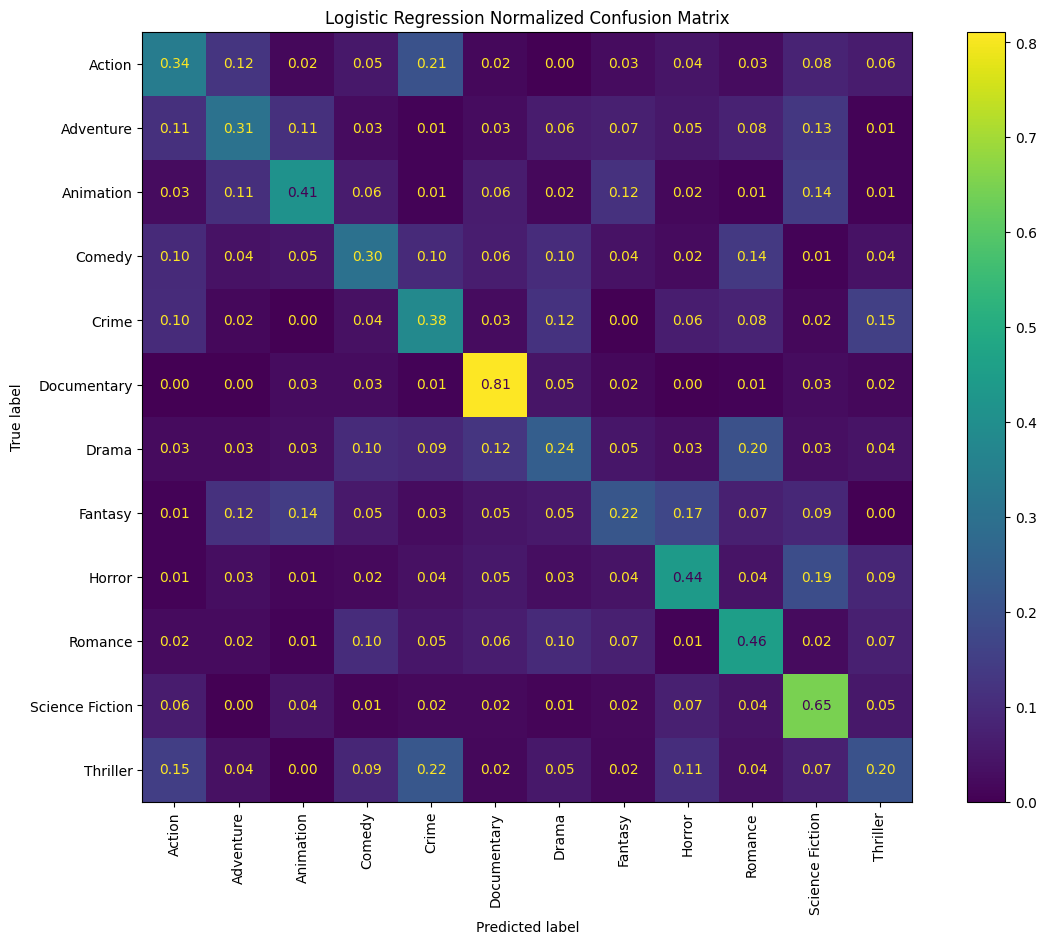

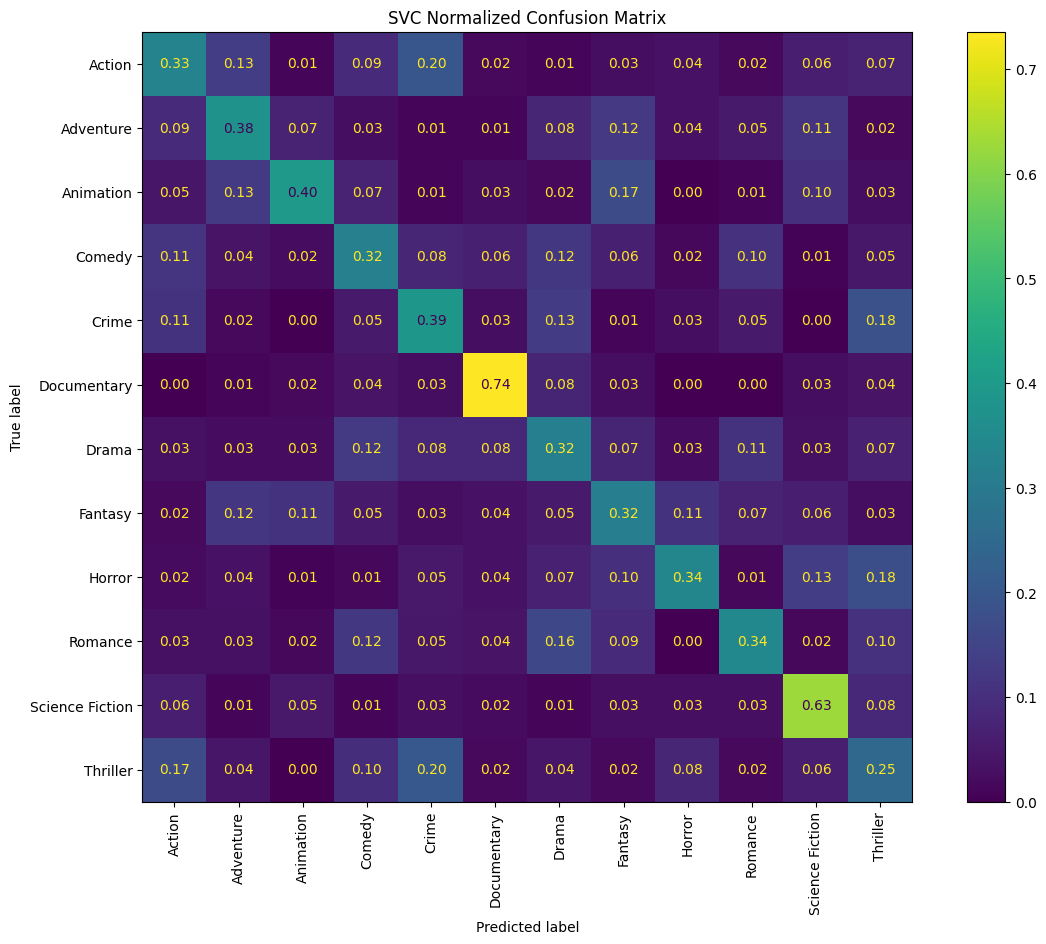

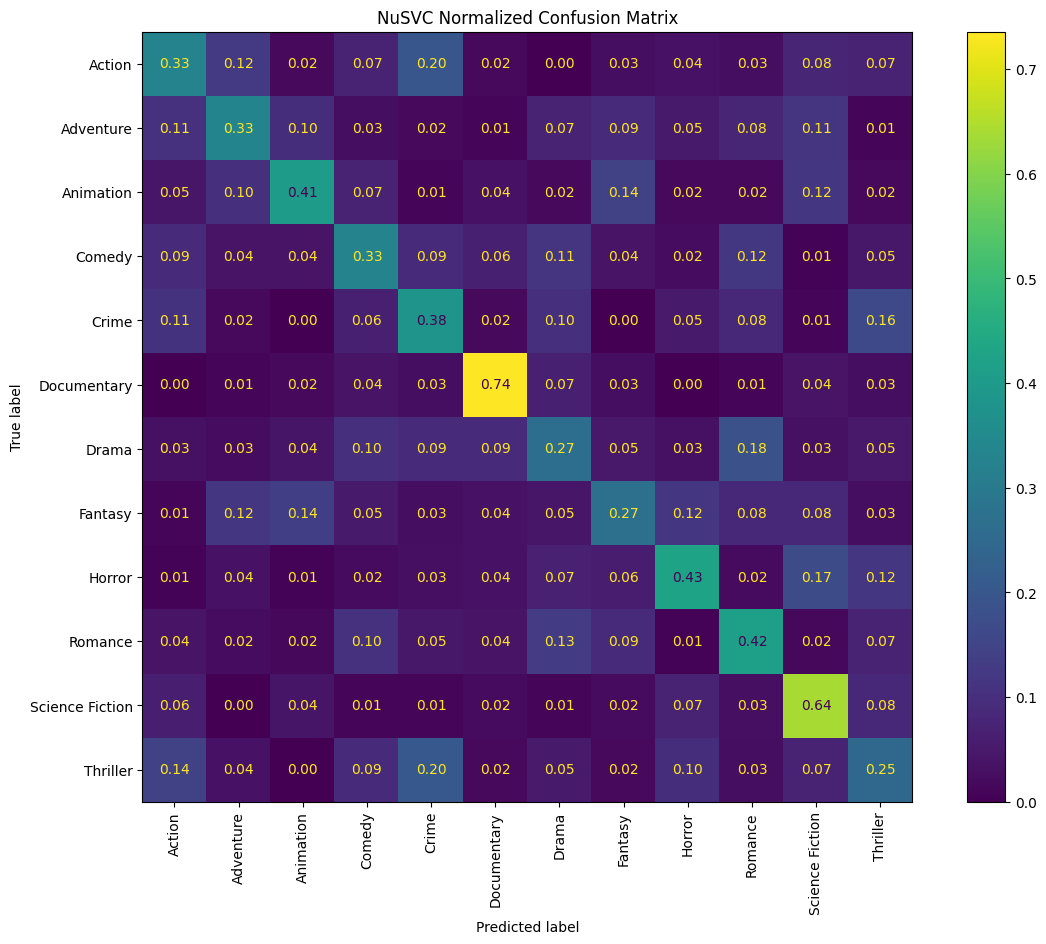

In [135]:
plot_confusion_matrix(y_test, LR_y_pred, 'Logistic Regression', classes)
plot_confusion_matrix(y_test, SVC_y_pred, 'SVC', classes)
plot_confusion_matrix(y_test, NuSVC_y_pred, 'NuSVC', classes)
# plot_confusion_matrix(y_test, RF_y_pred, 'Random Forest', classes)

[ 0  0  3 ...  5 10  3]


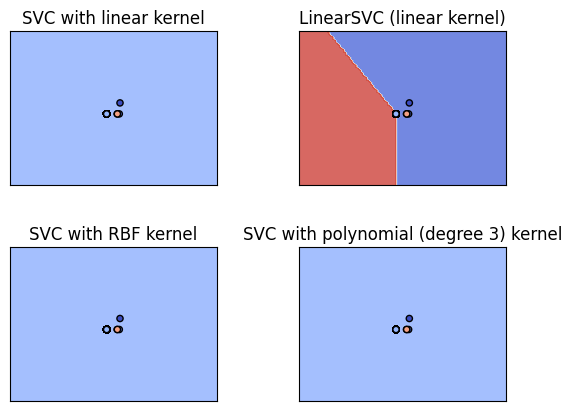

In [136]:
from sklearn.inspection import DecisionBoundaryDisplay

# Convertir les genres en labels numériques
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y_train)
print(y_numeric)

# Take the first two features. We could avoid this by using a two-dim dataset
X = X_train_tf[:, :2].toarray()
y = y_numeric

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# TEST


In [137]:
# Liste to stock model by genre
models_by_genre = {}

for genre in classes:
  y_train_genre = y_train.str.contains(genre).astype(int)
  # Create Model
  model = LogisticRegression(max_iter=1000, n_jobs=6)
  # train model on train data
  model.fit(X_train_tf, y_train_genre)
  # Stock model in list
  models_by_genre[genre] = model

In [138]:
# prediction for each genre
predictions_by_genre = {}

for genre, model in models_by_genre.items():
    # Predict actual genre
    predictions = model.predict(X_test_tf)
    predictions_by_genre[genre] = predictions

In [139]:
# Evaluation
accuracy_by_genre = {}

for genre, predictions in predictions_by_genre.items():
    # Extract real for actual genre
    y_test_genre = y_test.str.contains(genre).astype(int)

    # get Accuracy
    accuracy = accuracy_score(y_test_genre, predictions)
    accuracy_by_genre[genre] = accuracy
    print(f"=================== {genre} ===================")
    print(f"Accuracy : {accuracy}")
    print(f"F1 score : {f1_score(y_test_genre, predictions)}")
    print(f"Recall score : {recall_score(y_test_genre, predictions)}")
    print(f"Precision score : {precision_score(y_test_genre, predictions)}")

=================== Action ===================
Accuracy : 0.9188405797101449
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Adventure ===================
Accuracy : 0.9173913043478261
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Animation ===================
Accuracy : 0.9195652173913044
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Comedy ===================
Accuracy : 0.9094202898550725
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Crime ===================
Accuracy : 0.9202898550724637
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Documentary ===================
Accuracy : 0.9355072463768116
F1 score : 0.2879999999999999
Recall score : 0.16981132075471697
Precision score : 0.9473684210526315
=================== Drama ===================
Accuracy : 0.9130434782608695
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
==============

C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages